<a href="https://colab.research.google.com/github/khoabom02/AI_Basic/blob/main/Final_Report/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
from os import listdir
import tensorflow as tf
from tensorflow import keras
from numpy import asarray,save
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
test_path="/content/drive/MyDrive/AI_Final_Report/Tomato_Leaf/TestTomato"
train_path="/content/drive/MyDrive/AI_Final_Report/Tomato_Leaf/TrainTomato"
val_path="/content/drive/MyDrive/AI_Final_Report/Tomato_Leaf/ValTomato"

In [ ]:
train_datagen = ImageDataGenerator( rescale=1./255,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(train_path,
            target_size=(240, 240), batch_size=32,
            class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,
            target_size=(240, 240),batch_size=32,
            class_mode='categorical')
val_set = train_datagen.flow_from_directory(val_path,
            target_size=(240, 240),batch_size=32,
            shuffle=True,class_mode='categorical')


Found 650 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [ ]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (240,240, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

#ANN
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 240, 240, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 120, 120, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 120, 120, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 128)     

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<ipython-input-35-bcfb8d4eedbe>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_set, epochs=100, verbose=1, validation_data=test_set)


Epoch 1/100
21/21 [==============================] - 24s 990ms/step - loss: 2.3985 - accuracy: 0.1077 - val_loss: 2.2794 - val_accuracy: 0.1000
Epoch 2/100
21/21 [==============================] - 12s 588ms/step - loss: 2.2390 - accuracy: 0.1323 - val_loss: 2.1488 - val_accuracy: 0.2267
Epoch 3/100
21/21 [==============================] - 12s 583ms/step - loss: 2.1494 - accuracy: 0.1908 - val_loss: 2.1161 - val_accuracy: 0.1867
Epoch 4/100
21/21 [==============================] - 13s 605ms/step - loss: 2.0257 - accuracy: 0.2308 - val_loss: 1.9044 - val_accuracy: 0.2367
Epoch 5/100
21/21 [==============================] - 12s 564ms/step - loss: 1.9464 - accuracy: 0.2492 - val_loss: 1.9802 - val_accuracy: 0.2433
Epoch 6/100
21/21 [==============================] - 12s 593ms/step - loss: 1.9561 - accuracy: 0.2369 - val_loss: 2.1008 - val_accuracy: 0.2400
Epoch 7/100
21/21 [==============================] - 12s 583ms/step - loss: 1.7028 - accuracy: 0.3585 - val_loss: 1.7405 - val_accuracy:

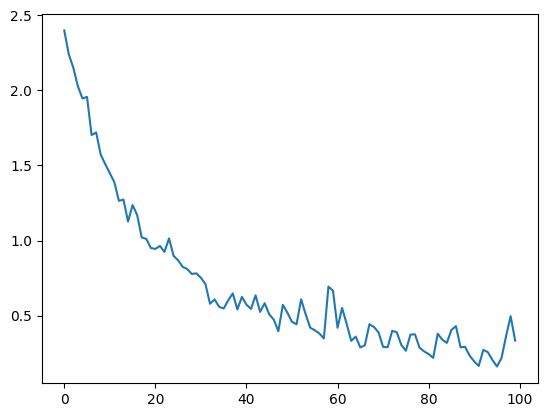

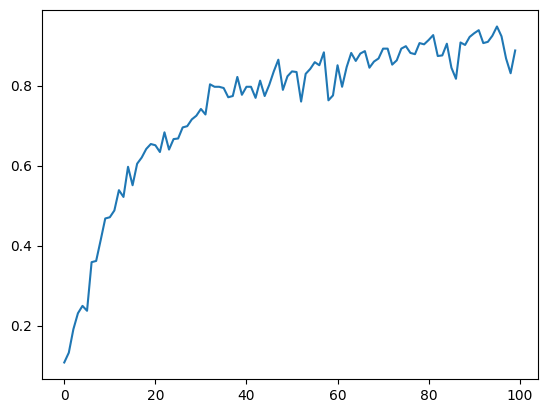

In [ ]:
# Train model
history=model.fit_generator(train_set, epochs=100, verbose=1, validation_data=test_set)
plt.plot(history.history["loss"], label ="Train loss")
plt.show()
plt.plot(history.history["accuracy"], label ="Accuracy")
plt.show()

<ipython-input-40-24896c5496ba>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_set,epochs=50,verbose=1,validation_data=test_set)


Epoch 1/50
21/21 [==============================] - 12s 554ms/step - loss: 0.3113 - accuracy: 0.8892 - val_loss: 0.8932 - val_accuracy: 0.7567
Epoch 2/50
21/21 [==============================] - 12s 565ms/step - loss: 0.2252 - accuracy: 0.9169 - val_loss: 1.3970 - val_accuracy: 0.7567
Epoch 3/50
21/21 [==============================] - 12s 574ms/step - loss: 0.2072 - accuracy: 0.9169 - val_loss: 1.4530 - val_accuracy: 0.7267
Epoch 4/50
21/21 [==============================] - 13s 613ms/step - loss: 0.1921 - accuracy: 0.9338 - val_loss: 0.7735 - val_accuracy: 0.8167
Epoch 5/50
21/21 [==============================] - 12s 579ms/step - loss: 0.2165 - accuracy: 0.9185 - val_loss: 1.4642 - val_accuracy: 0.7200
Epoch 6/50
21/21 [==============================] - 12s 575ms/step - loss: 0.2161 - accuracy: 0.9354 - val_loss: 0.8613 - val_accuracy: 0.7833
Epoch 7/50
21/21 [==============================] - 13s 597ms/step - loss: 0.3055 - accuracy: 0.9015 - val_loss: 1.0798 - val_accuracy: 0.7567

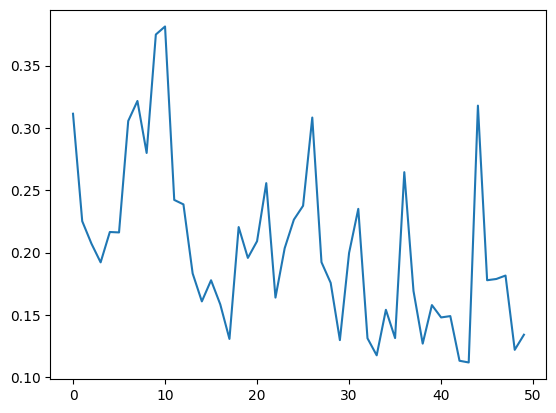

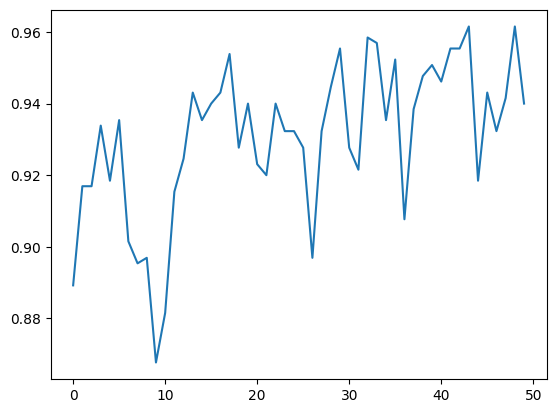

In [ ]:
# Train model
history=model.fit_generator(train_set,epochs=50,verbose=1,validation_data=test_set)
plt.plot(history.history["loss"], label ="Train loss")
plt.show()
plt.plot(history.history["accuracy"], label ="Accuracy")
plt.show()

<ipython-input-41-e74089d34ed2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_set,epochs=20,verbose=1,validation_data=test_set)


Epoch 1/20
21/21 [==============================] - 12s 576ms/step - loss: 0.1041 - accuracy: 0.9692 - val_loss: 1.6973 - val_accuracy: 0.7333
Epoch 2/20
21/21 [==============================] - 12s 560ms/step - loss: 0.1493 - accuracy: 0.9492 - val_loss: 1.6503 - val_accuracy: 0.7500
Epoch 3/20
21/21 [==============================] - 12s 549ms/step - loss: 0.1301 - accuracy: 0.9492 - val_loss: 1.2653 - val_accuracy: 0.7667
Epoch 4/20
21/21 [==============================] - 11s 519ms/step - loss: 0.1045 - accuracy: 0.9646 - val_loss: 1.7896 - val_accuracy: 0.7467
Epoch 5/20
21/21 [==============================] - 11s 519ms/step - loss: 0.0755 - accuracy: 0.9723 - val_loss: 2.9732 - val_accuracy: 0.6833
Epoch 6/20
21/21 [==============================] - 12s 562ms/step - loss: 0.1447 - accuracy: 0.9338 - val_loss: 2.0134 - val_accuracy: 0.7067
Epoch 7/20
21/21 [==============================] - 12s 586ms/step - loss: 0.0791 - accuracy: 0.9738 - val_loss: 1.9727 - val_accuracy: 0.7733

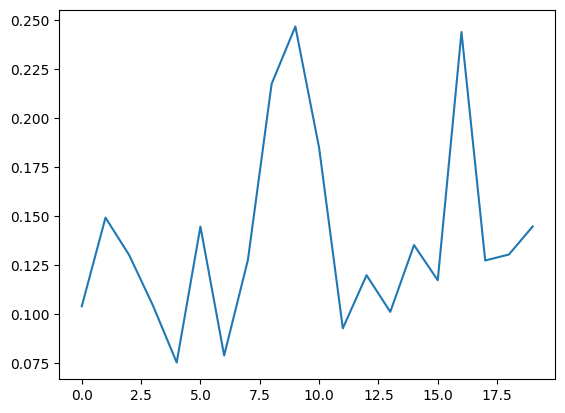

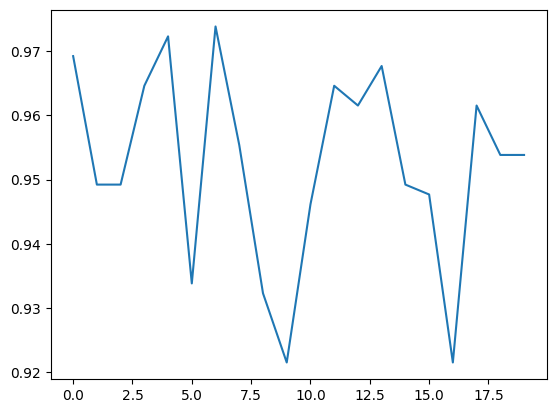

In [ ]:
# Train model
history=model.fit_generator(train_set,epochs=20,verbose=1,validation_data=test_set)
plt.plot(history.history["loss"], label ="Train loss")
plt.show()
plt.plot(history.history["accuracy"], label ="Accuracy")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AI_Final_Report/Tomato_Leaf/final.h5')

1/1 [==============================] - 0s 80ms/step
Predicted:  Tomato_MosaicVirus_Disease 


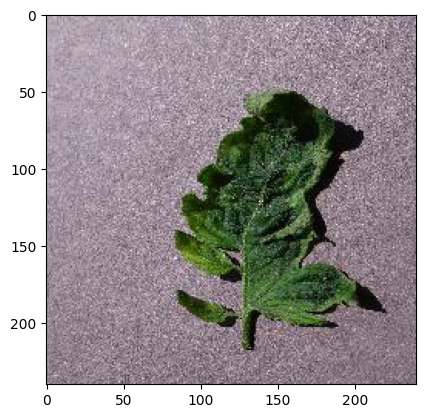

In [ ]:
Name_Disease_Leaf = ['Tomato_Bacterial_Spot_Disease',
                     'Tomato_EarlyBlight_Disease',
                     'Tomato_Healthy',
                     'Tomato_LateBlight_Disease',
                     'Tomato_LeafMold_Disease',
                     'Tomato_MosaicVirus_Disease ',
                     'Tomato_Septoria_LeafSpot_Disease ',
                     'Tomato_SpiderMites Two-spotted_SpiderMite_Disease ',
                     'Tomato_TargetSpot_Disease',
                     'Tomato_Tomato_YellowLeaf_CurlVirus_Disease']
filePath = '/content/drive/MyDrive/AI_Final_Report/Tomato_Leaf/TestTomato/MosaicVirus/Tomato___Tomato_mosaic_virus (13).JPG'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(240,240))
arrayImage = img_to_array(testImage).reshape(1,240,240,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", Name_Disease_Leaf[pred])
plt.imshow(testImage)